# Resultados Trabalho 2

Dataset: https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance

## Importando as bibliotecas principais

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

## Lendo o dataset

In [144]:
# Carregar os dados
dados = pd.read_csv('study_performance.csv')

# Visualizar as primeiras linhas do dataset
dados.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Análise de Regressão

### Gráfico de Resíduos
Vamos primeiramente plotar o gráfico de resíduos para verificar se há alguma violação das suposições da regressão linear, como a homogeneidade da variância (homoscedasticidade), a linearidade e a independência dos resíduos.

- X contém as variáveis preditoras (reading_score e writing_score).
- y é a variável que queremos prever (math_score).

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Sat, 29 Jun 2024   Prob (F-statistic):          2.25e-243
Time:                        23:33:23   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.5241      1.328      5.665

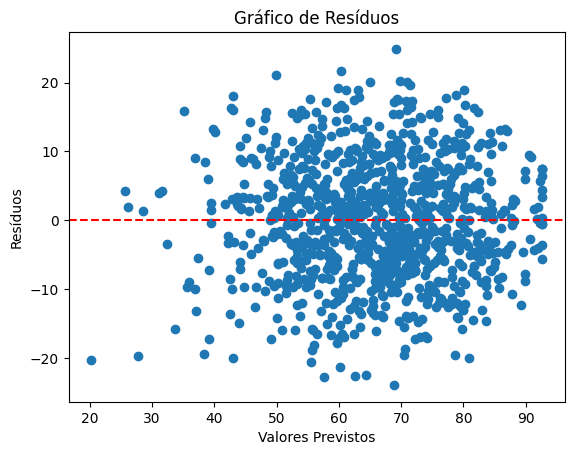

In [145]:
# Definir as variáveis dependentes e independentes
X = dados[['reading_score', 'writing_score']]  # Variáveis independentes
y = dados['math_score']  # Variável dependente

# Adicionar uma constante ao modelo (intercepto)
X = sm.add_constant(X)  

# Criar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()  

# Imprimir o resumo do modelo
print(modelo.summary())  

# Plotar os resíduos para verificar a homogeneidade da variância
plt.scatter(modelo.predict(), modelo.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()

#### Conclusões
- **Homoscedasticidade:** A variância dos resíduos parece ser aproximadamente constante.

- **Linearidade:** A relação entre as variáveis independentes e a variável dependente é linear.

- **Independência dos Resíduos:** Os resíduos são independentes entre si.

- **Outliers:** Existem alguns outliers que podem influenciar o modelo.

Em geral, o gráfico de resíduos sugere que as suposições básicas da regressão linear estão sendo atendidas. No entanto, a presença de outliers pode exigir uma análise adicional para garantir que eles não estejam distorcendo os resultados do modelo.

### Regressão Linear
Vamos agora realizar uma regressão linear entre as variáveis reading_score e math_score para entender melhor a relação entre essas duas variáveis específicas. Análise nos permitirá determinar se há uma relação linear significativa entre a habilidade de leitura e a habilidade matemática dos alunos, medindo o quanto a variação em reading_score pode explicar a variação em math_score.

- X contém as variáveis preditoras (reading_score).
- y é a variável que queremos prever (math_score).

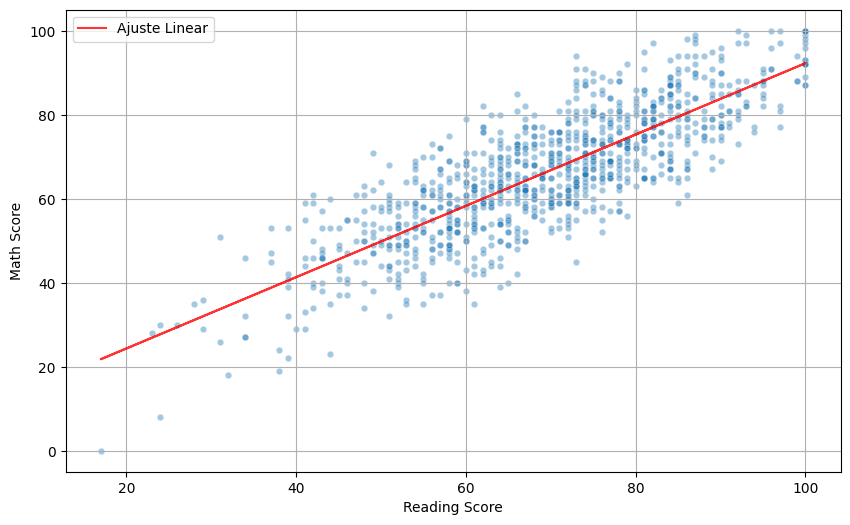

Mean Squared Error (MSE) - Linear: 76.1565134634969
R-squared (R²) - Linear: 0.668436506450109


In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dados
X = dados[['reading_score']].values # Variável independente
y = dados['math_score'].values # Variável dependente

# Modelo de regressão linear
modelo_linear = LinearRegression()
modelo_linear.fit(X, y)

# Previsões
y_pred_linear = modelo_linear.predict(X)

# Plotagem
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='reading_score', y='math_score', alpha=0.4, s=22)
plt.plot(dados['reading_score'], y_pred_linear, color='red', alpha=0.8, label='Ajuste Linear')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.legend()
plt.grid(True)
plt.show()

# Métricas de avaliação
mse_linear = mean_squared_error(y, y_pred_linear)
r2_linear = r2_score(y, y_pred_linear)
print(f'Mean Squared Error (MSE) - Linear: {mse_linear}')
print(f'R-squared (R²) - Linear: {r2_linear}')


Como esperado, pode-se verificar uma relação linear entre as notas dos alunos nessas duas disciplinas. Entretanto, a fim de obter-se uma análise mais abrangente, vamos analisar a variável math_score em relação às duas outras variáveis quantitativas do dataset, reading_score e math_score, em uma regressão linear múltipla. 

- X contém as variáveis preditoras (reading_score e writing_score).
- y é a variável que queremos prever (math_score).

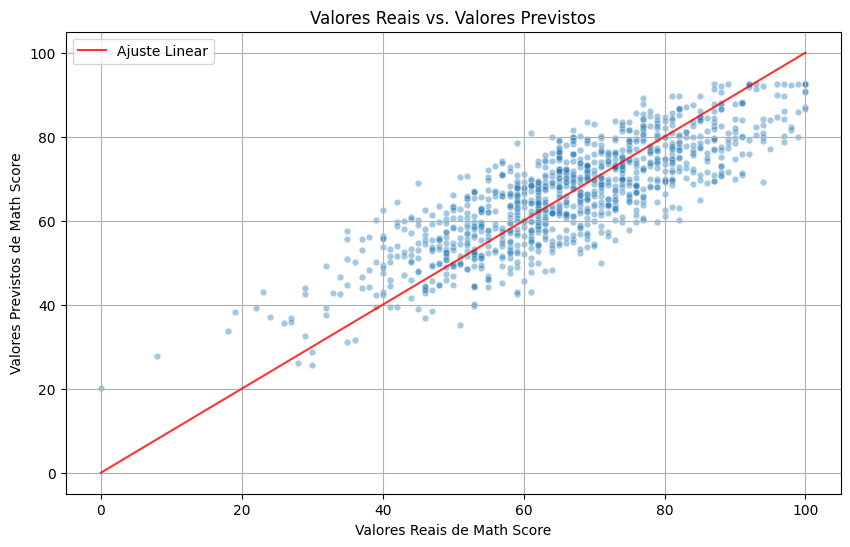

Mean Squared Error (MSE) - Linear Múltiplo: 74.88297279353486
R-squared (R²) - Linear Múltiplo: 0.6739811351956578


In [147]:
# Dados
X = dados[['reading_score', 'writing_score']].values  # Duas variáveis preditoras
y = dados['math_score'].values  # Variável dependente

# Modelo de regressão linear múltipla
modelo_linear_multiplo = LinearRegression()
modelo_linear_multiplo.fit(X, y)

# Previsões
y_pred_linear_multiplo = modelo_linear_multiplo.predict(X)

# Plotagem dos valores reais vs previstos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=y_pred_linear_multiplo, alpha=0.4, s=22)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', alpha=0.8, label='Ajuste Linear')
plt.xlabel('Valores Reais de Math Score')
plt.ylabel('Valores Previstos de Math Score')
plt.legend()
plt.grid(True)
plt.title('Valores Reais vs. Valores Previstos')
plt.show()

# Métricas de avaliação
mse_linear_multiplo = mean_squared_error(y, y_pred_linear_multiplo)
r2_linear_multiplo = r2_score(y, y_pred_linear_multiplo)
print(f'Mean Squared Error (MSE) - Linear Múltiplo: {mse_linear_multiplo}')
print(f'R-squared (R²) - Linear Múltiplo: {r2_linear_multiplo}')


#### Conclusões
A maioria dos pontos está próxima da linha vermelha, sugerindo que o modelo de regressão linear múltipla está fazendo um bom trabalho ao prever math_score com base em reading_score e writing_score. A distribuição dos pontos ao longo da linha de ajuste linear mostra uma relação aproximadamente linear entre os valores previstos e os valores reais.

Alguns pontos estão distantes da linha de ajuste, indicando previsões menos precisas para esses casos específicos. Esses pontos podem ser considerados outliers e podem indicar que há fatores adicionais que não estão sendo considerados no modelo ou possíveis erros nos dados.

**Métricas de Avaliação:**
- MSE: 74.883
    - O MSE mede a média dos quadrados dos erros entre os valores observados e previstos. Um MSE menor indica um modelo mais preciso. Neste caso, o valor de 74.88297279353486 sugere que, em média, os quadrados dos erros de previsão são 74.88, o que é uma medida da variabilidade dos resíduos do modelo.
- R²: 0.674
    - O R² mede a proporção da variância na variável dependente (math_score) que é explicada pelas variáveis independentes (reading_score e writing_score). Um valor de R² de 0.67398 indica que aproximadamente 67.4% da variância em math_score pode ser explicada pelo modelo de regressão linear múltipla. Esse valor sugere um ajuste razoavelmente bom do modelo, indicando que ele explica bem a relação entre as variáveis preditoras e a variável dependente.

## ANOVA
A Análise de Variância (ANOVA) permite avaliar se há diferenças estatisticamente significativas nas médias de uma variável dependente entre dois ou mais grupos. Com a ANOVA, é possível determinar se as variações observadas nos dados são devidas aos efeitos dos fatores estudados ou ao acaso, fornecendo uma forma robusta de comparar múltiplos grupos simultaneamente.

In [148]:
from statsmodels.formula.api import ols

# ANOVA para matemática
model = ols('math_score ~ C(gender) + C(race_ethnicity) + C(parental_level_of_education) + C(lunch) + C(test_preparation_course)', data=dados).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA para math_score\n', anova_table)

# ANOVA para leitura
model = ols('reading_score ~ C(gender) + C(race_ethnicity) + C(parental_level_of_education) + C(lunch) + C(test_preparation_course)', data=dados).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('\n\nANOVA para reading_score\n', anova_table)

# ANOVA para redação
model = ols('writing_score ~ C(gender) + C(race_ethnicity) + C(parental_level_of_education) + C(lunch) + C(test_preparation_course)', data=dados).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('\n\nANOVA para writing_score\n', anova_table)

ANOVA para math_score
                                        sum_sq     df           F        PR(>F)
C(gender)                         6147.862107    1.0   35.449864  3.634084e-09
C(race_ethnicity)                 8515.753855    4.0   12.275906  9.576776e-10
C(parental_level_of_education)    6623.725875    5.0    7.638759  4.688883e-07
C(lunch)                         26937.650714    1.0  155.328153  3.242727e-33
C(test_preparation_course)        6828.856722    1.0   39.376622  5.223402e-10
Residual                        171169.622261  987.0         NaN           NaN


ANOVA para reading_score
                                        sum_sq     df          F        PR(>F)
C(gender)                        12320.013119    1.0  73.897105  3.186205e-17
C(race_ethnicity)                 2633.133723    4.0   3.948473  3.472782e-03
C(parental_level_of_education)    7323.108642    5.0   8.784999  3.625569e-08
C(lunch)                         11954.401477    1.0  71.704117  8.967838e-17
C(test

### Conclusões
Todos os fatores (gênero, etnia, nível de educação dos pais, tipo de almoço e curso de preparação para o teste) têm um efeito estatisticamente significativo no desempenho em matemática dos estudantes, com valores p muito pequenos, todos abaixo de 0.05. Isso sugere que essas variáveis qualitativas têm uma influência significativa nas pontuações de matemática dos alunos.

Por isso, o intuito do trabalho é evidenciado, pois é notável que as características socioeconômicas estão correlacionadas ao desempenho acadêmico dos alunos. 

## Teste Qui-Quadrado
O teste Qui-Quadrado indica se há uma associação significativa entre duas variáveis categóricas. Nesse contexto, escolheu-se verificar se as variáveis participação no curso de preparação para testes (test_preparation_course) e nível educacional dos pais (parental_level_of_education) está associada às categorias de pontuação em matemática (math_score).

A **Hipótese Nula** consiste em afirmar que não há associação significativa entre a participação no curso de preparação ou no nível educacional dos pais e a pontuação em matemática. Ou seja, as frequências observadas nas categorias de pontuação em matemática não diferem significativamente das frequências esperadas se não houvesse associação entre as variáveis.

A **Hipótese Alternativa** consiste em afirmar que há uma associação significativa entre a participação no curso de preparação ou no nível educacional dos pais e a pontuação em matemática. Isso significa que as frequências observadas nas categorias de pontuação em matemática diferem significativamente das frequências esperadas, indicando uma relação entre as variáveis.

In [149]:
from scipy.stats import chi2_contingency

# Agrupar as pontuações de matemática em categorias (por exemplo)
dados['math_score_cat'] = pd.cut(dados['math_score'], bins=[0, 60, 80, 100], labels=['Baixo', 'Médio', 'Alto'])

# Criar uma tabela de contingência entre 'test_preparation_course' e 'math_score_cat'
tab_conting = pd.crosstab(dados['test_preparation_course'], dados['math_score_cat'])
print("Tabela de Contingência (Frequências Observadas):")
print(tab_conting)

# Executar o teste qui-quadrado
chi2, p_value, dof, expected = chi2_contingency(tab_conting)

# Imprimir os resultados
print("\nTeste Qui-Quadrado")
print("Chi2 Statistic:", chi2)
print("P-valor:", p_value)
print("Graus de Liberdade:", dof)

print("\nTabela de Frequências Esperadas:")
print(expected)

Tabela de Contingência (Frequências Observadas):
math_score_cat           Baixo  Médio  Alto
test_preparation_course                    
completed                   93    181    84
none                       245    304    92

Teste Qui-Quadrado
Chi2 Statistic: 21.465940454139826
P-valor: 2.1813746204046104e-05
Graus de Liberdade: 2

Tabela de Frequências Esperadas:
[[121.12512513 173.8038038   63.07107107]
 [216.87487487 311.1961962  112.92892893]]


In [150]:
# Criar uma tabela de contingência entre 'parental_level_of_education' e 'math_score_cat'
tab_conting = pd.crosstab(dados['parental_level_of_education'], dados['math_score_cat'])
print("Tabela de Contingência (Frequências Observadas):")
print(tab_conting)

# Executar o teste qui-quadrado
chi2, p_value, dof, expected = chi2_contingency(tab_conting)

# Imprimir os resultados
print("\nTeste Qui-Quadrado")
print("Chi2 Statistic:", chi2)
print("P-valor:", p_value)
print("Graus de Liberdade:", dof)

print("\nTabela de Frequências Esperadas:")
print(expected)

Tabela de Contingência (Frequências Observadas):
math_score_cat               Baixo  Médio  Alto
parental_level_of_education                    
associate's degree              74     94    54
bachelor's degree               27     66    25
high school                     85     92    19
master's degree                 17     25    17
some college                    69    118    39
some high school                66     90    22

Teste Qui-Quadrado
Chi2 Statistic: 36.12928715926192
P-valor: 7.997630624673162e-05
Graus de Liberdade: 10

Tabela de Frequências Esperadas:
[[ 75.11111111 107.77777778  39.11111111]
 [ 39.92392392  57.28728729  20.78878879]
 [ 66.31431431  95.15515516  34.53053053]
 [ 19.96196196  28.64364364  10.39439439]
 [ 76.46446446 109.71971972  39.81581582]
 [ 60.22422422  86.41641642  31.35935936]]


### Conclusões
- **Chi2:** A estatística qui-quadrado quantifica a magnitude da diferença entre as frequências observadas e as frequências esperadas sob a hipótese nula (que assume que não há associação entre as variáveis). Em ambos os casos, o valor da estatística Qui-Quadrado é elevado, 21.466 e 36.129, respectivamente. Isso indica uma forte evidência contra a hipótese nula.

- **P-valor:** em ambos os casos foi muito menor do que o nível de significância comum (como 0.05). Isso significa que há fortes evidências estatísticas para rejeitar a hipótese nula.

Devido a esses fatores, pode-se concluir que há uma correlação entre as condições socioeconômicas do aluno e seu desempenho acadêmico, o que indica uma rejeição da hipótese nula. 